In [ ]:
#Description : this program attemps to optimize a users portfolio using the Efficient Frontier



In [1]:
#Import the python libraries
from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
#Get the stock symbols/ tickers in the portfolio
#FAANG 

assets = ['SOL.JO', 'LEW.JO', 'VOD.JO', 'TKG.JO', 'APN.JO', 'MCG.JO', 'STX40.JO', 'ARI.JO', 'MST.JO', 'AFT.JO', 'CSB.JO']

In [3]:
# #Get the stock symbols/ tickers in the portfolio
# #FAANG 

# assets = ['FB', 'AMZN', 'AAPL', 'NFLX', 'GOOG', ]

In [4]:
#Assign weights to the stocks.
weights = np.array([0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091]) #20 percent each

In [5]:
# #Assign weights to the stocks.
# weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2]) #20 percent each

In [6]:
#Get the stock/portfolio starting date
stockStartDate = '2012-01-01'

In [7]:
#Get the stock stocks ending date (date)
today = datetime.today().strftime('%Y-%m-%d')
today

'2022-04-24'

In [8]:
#create a dataframe to store the adjusted close price of the stocks
df = pd.DataFrame()

#Store the adjusted close price of the stock into df 
for stock in assets:
    df[stock] = web.DataReader(stock, data_source='yahoo', start = stockStartDate, end = today)['Adj Close']

In [9]:
#Show the df
df

,SOL.JO,LEW.JO,VOD.JO,TKG.JO,APN.JO,MCG.JO,STX40.JO,ARI.JO,MST.JO,AFT.JO,CSB.JO
Date,,,,,,,,,,,
2012-01-02,29026.355469,3567.043945,4872.005859,2242.778076,8951.541016,NaN,NaN,8613.099609,386.153412,318.693268,7671.385254
2012-01-03,29440.482422,3617.778809,4971.089355,2250.498291,9175.607422,NaN,2934.0,8864.946289,399.944641,324.734924,7378.833984
2012-01-04,29665.607422,3633.801025,4943.718262,2246.638428,9155.237305,NaN,2943.0,8940.499023,389.601257,320.958893,7391.184082
2012-01-05,29124.234375,3547.016357,4899.376465,2219.617188,9166.347656,NaN,2905.0,8766.726562,388.911682,317.182922,7566.067383
2012-01-06,29155.867188,3544.346680,5008.312988,2215.756836,9291.341797,NaN,2926.0,8798.962891,387.532562,317.182922,7476.350098
...,...,...,...,...,...,...,...,...,...,...,...
2022-04-14,36870.000000,4670.000000,14793.000000,4429.000000,18007.000000,12823.0,6762.0,26768.000000,1640.000000,6810.000000,27428.000000
2022-04-19,37056.000000,4650.000000,14798.000000,4487.000000,17693.000000,12856.0,6809.0,26893.000000,1619.000000,6660.000000,28351.000000
2022-04-20,37115.000000,4800.000000,14871.000000,4430.000000,17996.000000,12850.0,6721.0,26485.000000,1599.000000,6580.000000,28300.000000


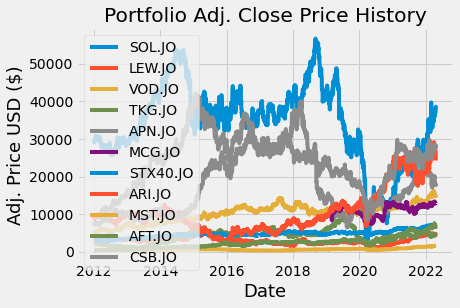

In [10]:
# visually show the stock / portfolio
title = 'Portfolio Adj. Close Price History'

#Get the stocks
my_stocks = df

#Create and plot the graph
for c in my_stocks.columns.values:
    plt.plot(my_stocks[c], label = c)
    
plt.title(title)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Adj. Price USD ($)', fontsize = 18)
plt.legend(my_stocks.columns.values, loc= 'upper left')
plt.show()

In [11]:
#Show the daily simply return
returns = df.pct_change()
returns

,SOL.JO,LEW.JO,VOD.JO,TKG.JO,APN.JO,MCG.JO,STX40.JO,ARI.JO,MST.JO,AFT.JO,CSB.JO
Date,,,,,,,,,,,
2012-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-03,0.014267,0.014223,0.020337,0.003442,0.025031,NaN,NaN,0.029240,0.035714,0.018958,-0.038135
2012-01-04,0.007647,0.004429,-0.005506,-0.001715,-0.002220,NaN,0.003067,0.008523,-0.025862,-0.011628,0.001674
2012-01-05,-0.018249,-0.023883,-0.008969,-0.012027,0.001214,NaN,-0.012912,-0.019437,-0.001770,-0.011765,0.023661
2012-01-06,0.001086,-0.000753,0.022235,-0.001739,0.013636,NaN,0.007229,0.003677,-0.003546,0.000000,-0.011858
...,...,...,...,...,...,...,...,...,...,...,...
2022-04-14,-0.003514,0.011918,-0.006314,-0.001803,-0.004038,-0.008735,0.002075,-0.018876,0.009231,0.031818,-0.026927
2022-04-19,0.005045,-0.004283,0.000338,0.013096,-0.017438,0.002574,0.006951,0.004670,-0.012805,-0.022026,0.033652
2022-04-20,0.001592,0.032258,0.004933,-0.012703,0.017125,-0.000467,-0.012924,-0.015171,-0.012353,-0.012012,-0.001799


In [12]:
#Create and show the annualized covariance matrix
cov_matrix_annual = returns.cov() * 252
cov_matrix_annual

,SOL.JO,LEW.JO,VOD.JO,TKG.JO,APN.JO,MCG.JO,STX40.JO,ARI.JO,MST.JO,AFT.JO,CSB.JO
SOL.JO,0.267184,0.018260,0.018801,0.046907,0.027267,0.028117,0.041860,0.072150,0.007278,0.011404,0.025664
LEW.JO,0.018260,0.189696,0.012675,0.019511,0.010160,0.013779,0.013267,0.020328,0.003063,0.009763,0.018971
VOD.JO,0.018801,0.012675,0.054305,0.026915,0.020281,0.031393,0.015168,0.014429,0.003065,0.002928,0.007671
TKG.JO,0.046907,0.019511,0.026915,0.172064,0.020332,0.038747,0.021072,0.030792,0.011516,0.006261,0.022024
APN.JO,0.027267,0.010160,0.020281,0.020332,0.117965,0.026031,0.020550,0.024100,0.003670,0.005306,0.010267
MCG.JO,0.028117,0.013779,0.031393,0.038747,0.026031,0.103004,0.016066,0.024029,0.005359,0.015453,0.010017
STX40.JO,0.041860,0.013267,0.015168,0.021072,0.020550,0.016066,0.031484,0.035199,0.004354,0.005928,0.011895
ARI.JO,0.072150,0.020328,0.014429,0.030792,0.024100,0.024029,0.035199,0.176393,0.010230,0.006876,0.014428
MST.JO,0.007278,0.003063,0.003065,0.011516,0.003670,0.005359,0.004354,0.010230,0.121715,0.003421,0.001265
AFT.JO,0.011404,0.009763,0.002928,0.006261,0.005306,0.015453,0.005928,0.006876,0.003421,0.118852,0.007263


In [13]:
#Create the portfol variance
port_variance = np.dot( weights.T, np.dot(cov_matrix_annual, weights))
port_variance

0.027912060826518422

In [14]:
#Calculate the portfolio volatility aka standard deviation
port_volatility = np.sqrt(port_variance)
port_volatility

0.16706903012383362

In [15]:
#Calculate the annual portfolio return
portfolioSimpleAnnualReturn = np.sum(returns.mean() * weights) * 252
portfolioSimpleAnnualReturn

0.16787123998184658

In [16]:
#Show the expected annual return, volatility (risk), and variance

percent_var = str( round(port_variance, 2) * 100) + '%'
percent_vols = str(round(port_volatility, 2) * 100 ) + '%'
percent_ret = str(round(portfolioSimpleAnnualReturn, 2) * 100) + '%'

print('Expected annual return: '+ percent_ret)
print('Annual volatility / risk: '+ percent_vols)
print('Annual variance: '+  percent_var)

Expected annual return: 17.0%
Annual volatility / risk: 17.0%
Annual variance: 3.0%


In [24]:
pip install PyPortfolioOpt

Note: you may need to restart the kernel to use updated packages.


In [17]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [18]:
#Portfolio Optimization !

#Calculate the expected returns and the annualised sample covariance matrixof asset returns
mu = expected_returns.mean_historical_return(df)
s = risk_models.sample_cov(df)


#Optimize for max sharpe ratio 
ef = EfficientFrontier(mu, s)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose = True)


OrderedDict([('SOL.JO', 0.0), ('LEW.JO', 0.0), ('VOD.JO', 0.2267), ('TKG.JO', 0.0), ('APN.JO', 0.0), ('MCG.JO', 0.0), ('STX40.JO', 0.05349), ('ARI.JO', 0.01681), ('MST.JO', 0.15356), ('AFT.JO', 0.43459), ('CSB.JO', 0.11485)])
Expected annual return: 21.6%
Annual volatility: 18.3%
Sharpe Ratio: 1.07


(0.2155014531493432, 0.18267557115275174, 1.0702112598617062)

In [19]:
#Highlight total  copy and paste and must add to 1 



In [23]:
#Prices two commos ahead eg R1089.00 = R189.00,  (10000000 = 100000)
#Get the discrete alloacation of each share per stock
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(df)
weights = cleaned_weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value = 11501700.33)

allocation , leftover = da.lp_portfolio()
print('Discrete allocation:', allocation)
print('Funds remaining: R{:.2f}'.format(leftover))

Discrete allocation: {'VOD.JO': 174, 'STX40.JO': 93, 'ARI.JO': 8, 'MST.JO': 1101, 'AFT.JO': 751, 'CSB.JO': 48}
Funds remaining: R856.33
